In [1]:
import numpy as np
import pandas as pd
import open3d as o3d
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from pathlib import Path

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import utils
import calibration_utils

import importlib
importlib.reload(utils)
importlib.reload(calibration_utils)

<module 'calibration_utils' from '/home/tom/Documents/UNT/csce6260/projects/kitti-experiments/calibration_utils.py'>

## Load data

In [3]:
base = Path.home() / "kitti"
train_dir = base / "training"
test_dir = base / "testing"

In [4]:
train_img_dir = train_dir / "image_2"
kitti_images_train = sorted(train_img_dir.glob("*.png"))
test_img_dir = test_dir / "image_2"
kitti_images_test = sorted(test_img_dir.glob("*.png"))
print(f"# of training / testing images: {len(kitti_images_train)} / {len(kitti_images_test)}")

# of training / testing images: 7481 / 7518


In [5]:
train_labels_dir = train_dir / "label_2"
kitti_train_labels = sorted(train_labels_dir.glob("*.txt"))
print("# of training label files: {}".format(len(kitti_train_labels)))
example_label_file = utils.parse_label_file(kitti_train_labels[0])
print(example_label_file)

# of training label files: 7481
[{'type': 'Pedestrian', 'truncated': 0.0, 'occluded': 0, 'alpha': -0.2, 'bbox_2d_min': (712.4, 143.0), 'bbox_2d_max': (810.73, 307.92), 'dimensions': (1.89, 0.48, 1.2), 'centroid': (1.84, 1.47, 8.41), 'rotation_y': 0.01}]


In [6]:
velo_dir = train_dir / "velodyne"
point_cloud_train_files = sorted(velo_dir.glob("*.bin"))
print("# cloud files: {}".format(len(point_cloud_train_files)))
print('--> File Names')
print(point_cloud_train_files[:3])

# cloud files: 7481
--> File Names
[PosixPath('/home/tom/kitti/training/velodyne/000000.bin'), PosixPath('/home/tom/kitti/training/velodyne/000001.bin'), PosixPath('/home/tom/kitti/training/velodyne/000002.bin')]


In [7]:
calib_dir = train_dir / "calib"
calib_train_files = sorted(calib_dir.glob("*.txt"))
print("# of training calibration files: {}".format(len(calib_train_files)))
example_calib_file = utils.parse_calib_file(calib_train_files[0])
print(example_calib_file)

# of training calibration files: 7481
{'P0': array([[707.0493,   0.    , 604.0814,   0.    ],
       [  0.    , 707.0493, 180.5066,   0.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ]], dtype=float32), 'P1': array([[ 707.0493,    0.    ,  604.0814, -379.7842],
       [   0.    ,  707.0493,  180.5066,    0.    ],
       [   0.    ,    0.    ,    1.    ,    0.    ]], dtype=float32), 'P2': array([[ 7.070493e+02,  0.000000e+00,  6.040814e+02,  4.575831e+01],
       [ 0.000000e+00,  7.070493e+02,  1.805066e+02, -3.454157e-01],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00,  4.981016e-03]],
      dtype=float32), 'P3': array([[ 7.070493e+02,  0.000000e+00,  6.040814e+02, -3.341081e+02],
       [ 0.000000e+00,  7.070493e+02,  1.805066e+02,  2.330660e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00,  3.201153e-03]],
      dtype=float32), 'R0': array([[ 0.9999128 ,  0.01009263, -0.00851193],
       [-0.01012729,  0.9999406 , -0.00403767],
       [ 0.00847067,  0.00412352,  

Calibration data:
{'P0': array([[707.0493,   0.    , 604.0814,   0.    ],
       [  0.    , 707.0493, 180.5066,   0.    ],
       [  0.    ,   0.    ,   1.    ,   0.    ]], dtype=float32), 'P1': array([[ 707.0493,    0.    ,  604.0814, -379.7842],
       [   0.    ,  707.0493,  180.5066,    0.    ],
       [   0.    ,    0.    ,    1.    ,    0.    ]], dtype=float32), 'P2': array([[ 7.070493e+02,  0.000000e+00,  6.040814e+02,  4.575831e+01],
       [ 0.000000e+00,  7.070493e+02,  1.805066e+02, -3.454157e-01],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00,  4.981016e-03]],
      dtype=float32), 'P3': array([[ 7.070493e+02,  0.000000e+00,  6.040814e+02, -3.341081e+02],
       [ 0.000000e+00,  7.070493e+02,  1.805066e+02,  2.330660e+00],
       [ 0.000000e+00,  0.000000e+00,  1.000000e+00,  3.201153e-03]],
      dtype=float32), 'R0': array([[ 0.9999128 ,  0.01009263, -0.00851193],
       [-0.01012729,  0.9999406 , -0.00403767],
       [ 0.00847067,  0.00412352,  0.9999556 ]], dtype=

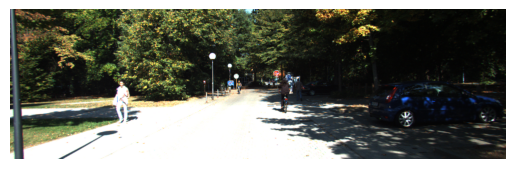

In [8]:
analysis_file_index = 5902
sample_calib = utils.parse_calib_file(calib_train_files[analysis_file_index])
print("Calibration data:")
print(sample_calib)

sample_label = utils.parse_label_file(kitti_train_labels[analysis_file_index])
print("Ground-truth objects and metadata:")
print(sample_label)

sample_image_path = kitti_images_train[analysis_file_index]
print(f"Sample Image Path: {sample_image_path}\n")
sample_image = mpimg.imread(sample_image_path)
plt.imshow(sample_image)
plt.axis('off')
plt.show()

In [9]:
bin_path = point_cloud_train_files[analysis_file_index]
print("Sample Cloud File Path: {}\n".format(bin_path))

points = utils.read_velodyne_bin(bin_path)

print('--> .bin File Content\n')
print(points[:3])

Sample Cloud File Path: /home/tom/kitti/training/velodyne/005902.bin

--> .bin File Content

[[77.704  0.169  2.837  0.   ]
 [78.408  1.649  2.861  0.   ]
 [77.905  4.089  2.847  0.   ]]


In [10]:
print('Min/Max values for all dimensions')
min_x, max_x = np.min(points[:, 0]), np.max(points[:, 0])
min_y, max_y = np.min(points[:, 1]), np.max(points[:, 1])
min_z, max_z = np.min(points[:, 2]), np.max(points[:, 2])
print(f"X: ({min_x:.2f}, {max_x:.2f})")
print(f"Y: ({min_y:.2f}, {max_y:.2f})")
print(f"Z: ({min_z:.2f}, {max_z:.2f})")

Min/Max values for all dimensions
X: (-79.72, 79.35)
Y: (-63.08, 45.41)
Z: (-2.51, 2.86)


## Voxel downsampling

In [11]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points[:, :3])
print("Original:", np.asarray(pcd.points).shape)
pcd = pcd.voxel_down_sample(voxel_size=0.2)
print("Downsampled:", np.asarray(pcd.points).shape)
o3d.visualization.draw_geometries([pcd], width=1600, height=900)

Original: (122794, 3)
Downsampled: (33122, 3)


## RANSAC Segmentation

In [12]:
plane_model, inliers = pcd.segment_plane(distance_threshold=0.3, ransac_n=3, num_iterations=150)
inlier_cloud = pcd.select_by_index(inliers)
inlier_cloud.paint_uniform_color([0, 1, 1])
outlier_cloud = pcd.select_by_index(inliers, invert=True)
outlier_cloud.paint_uniform_color([1, 0, 0])
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud], width=1600, height=900)

## DBSCAN Clustering

In [13]:
with o3d.utility.VerbosityContextManager(o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(outlier_cloud.cluster_dbscan(eps=0.45, min_points=10, print_progress=True))
print(labels, len(list(set(labels))))

[Open3D DEBUG] Precompute neighbors.
Precompute neighbors.[========[Open3D DEBUG] Done Precompute neighbors.
[Open3D DEBUG] Compute Clusters
Precompute neighbors.[========================================] 100%
Clustering[Open3D DEBUG] Done Compute Clusters: 185] 15%
[ -1  -1  -1 ...  -1  45 151] 186
Clustering[======================>                 ] 55%

In [14]:
max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
outlier_cloud.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([outlier_cloud], width=1600, height=900)

point cloud has 185 clusters


## Generate 3D Bounding Boxes

In [15]:
predicted_bboxes = []
indexes = pd.Series(range(len(labels))).groupby(labels, sort=False).apply(list).tolist()

MAX_POINTS = 300
MIN_POINTS = 25

for i in range(0, len(indexes)):
    nb_points = len(outlier_cloud.select_by_index(indexes[i]).points)
    if (nb_points > MIN_POINTS and nb_points < MAX_POINTS):
        sub_cloud = outlier_cloud.select_by_index(indexes[i])
        pred_bbox = sub_cloud.get_axis_aligned_bounding_box()
        pred_bbox.color = (1, 0, 0)
        predicted_bboxes.append(pred_bbox)

print(f"Number of predicted bounding boxes {len(predicted_bboxes)}")

Number of Bounding Boxes calculated 69


In [16]:
visuals = []
visuals.append(outlier_cloud)
visuals.extend(predicted_bboxes)
visuals.append(inlier_cloud)
o3d.visualization.draw_geometries(visuals, width=1600, height=900)

## Evaluate Predicted Bounding Boxes vs. Ground-Truth Bounding Boxes

In [17]:
print("# of predicted bounding boxes: {}".format(len(predicted_bboxes)))
restructured_pred_bboxes = []
for predicted_bbox in predicted_bboxes:
    box_min_bound = predicted_bbox.min_bound
    box_max_bound = predicted_bbox.max_bound
    min_corner = (predicted_bbox.min_bound[0], predicted_bbox.min_bound[1], predicted_bbox.min_bound[2])
    max_corner = (predicted_bbox.max_bound[0], predicted_bbox.max_bound[1], predicted_bbox.max_bound[2])
    restructured_pred_bboxes.append({"min": min_corner, "max": max_corner})

for i, restructured_pred_bbox in enumerate(restructured_pred_bboxes[:5]):
    min_corner_x, min_corner_y, min_corner_z = restructured_pred_bbox['min']
    max_corner_x, max_corner_y, max_corner_z = restructured_pred_bbox['max']
    print(f"Bounding Box #{i}: Min Corner: ({min_corner_x:.2f}, {min_corner_y:.2f}, {min_corner_z:.2f}), " \
          f"Max Corner: ({max_corner_x:.2f}, {max_corner_y:.2f}, {max_corner_z:.2f})")

# of predicted bounding box: 69
Bounding Box #0: Min Corner: (-9.43, -3.42, -1.84), Max Corner: (-6.44, -0.67, -1.72)
Bounding Box #1: Min Corner: (4.90, 3.77, -1.32), Max Corner: (5.01, 3.86, 0.42)
Bounding Box #2: Min Corner: (-4.28, -3.50, -1.11), Max Corner: (-3.89, -2.94, -0.17)
Bounding Box #3: Min Corner: (-10.73, -3.40, -1.84), Max Corner: (-8.95, -1.46, -1.72)
Bounding Box #4: Min Corner: (-5.46, 6.13, -1.61), Max Corner: (-3.47, 10.24, -0.20)


In [20]:
velo_to_cam = sample_calib['Tr_velo_to_cam']
velo_to_cam = np.vstack((velo_to_cam, [0, 0, 0, 1]))
cam_to_velo = calibration_utils.inverse_rigid_transform(velo_to_cam)

gt_bboxes = []
for label in sample_label:
    corners_3d_velo = calibration_utils.compute_box_3d(label, cam_to_velo)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(corners_3d_velo)
    gt_bbox = pcd.get_axis_aligned_bounding_box()
    gt_bbox.color = (0, 1, 0)
    gt_bboxes.append(gt_bbox)
print(gt_bboxes)

[AxisAlignedBoundingBox: min: (11.1414, 4.97208, -1.58158), max: (12.0483, 5.62372, 0.131201), AxisAlignedBoundingBox: min: (14.3085, -1.67552, -1.54447), max: (16.0141, -1.08012, 0.269073), AxisAlignedBoundingBox: min: (8.94196, -7.5428, -1.25428), max: (10.5796, -3.74815, 0.0679794), AxisAlignedBoundingBox: min: (35.243, 2.01382, -1.30869), max: (36.9693, 2.69987, 0.425121), AxisAlignedBoundingBox: min: (21.7584, -3.4039, -1.45692), max: (22.649, -2.85477, 0.365519), AxisAlignedBoundingBox: min: (27.5434, -8.5312, -1.23865), max: (29.1886, -4.10236, 0.185387)]


In [23]:
visuals = []
visuals.append(outlier_cloud)
visuals.extend(predicted_bboxes)
visuals.extend(gt_bboxes)
visuals.append(inlier_cloud)
o3d.visualization.draw_geometries(visuals_gt, width=1600, height=900)